## Time to get your hands dirty. Handwritten digits.

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 

**Spoiler alert: Davide's efficiency was ~80%, much worse than ML!**


2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.  

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results.

### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'` (I found the default solver had a bug, at least when I tried).

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

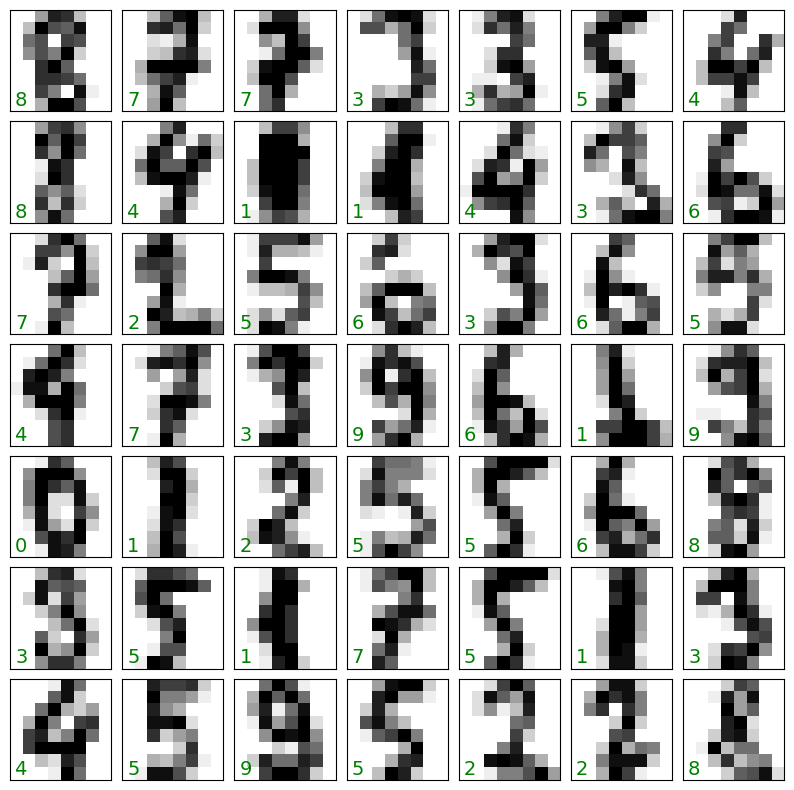

In [5]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(0)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

In [150]:
#49 così il reshape è sempre un quadrato per la visualizzazione
embedding = Isomap(n_components=49)
digits_transformed = embedding.fit_transform(digits.data[:500])
print(digits.data[:500].shape,digits_transformed.shape)

(500, 64) (500, 49)


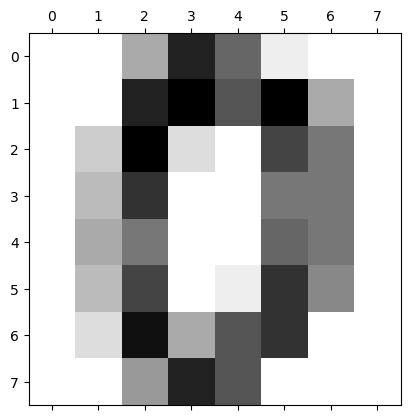

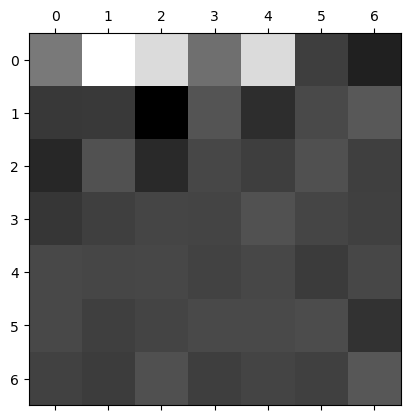

In [152]:
#tentativo di plottare l'embedding, non è che ci abbia capito troppo
plt.matshow(digits.data[0].reshape((8,8)), cmap = 'binary')
plt.matshow(digits_transformed[0].reshape((7,7)), cmap='binary')
plt.show()

In [153]:
#suddivisione del database in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits_transformed, digits.target[:500], test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 49) (100, 49) (400,) (100,)


In [159]:
#applicazione della logistic regression. Max_iter aumentato per avere convergenza
clf = LogisticRegression(solver ='sag', max_iter = 2000).fit(X_train, y_train)


Correct answer:  2
Predicted answer:  2


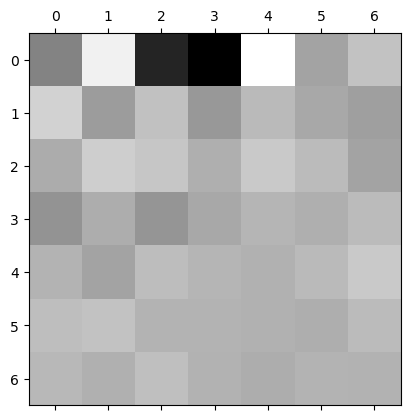

In [160]:
#visione di una predizione tanto per
chosen_index = 10
plt.matshow(X_test[chosen_index].reshape((7,7)), cmap = 'binary')
print('\nCorrect answer: ', str(y_test[chosen_index]))
print('Predicted answer: ', str(clf.predict(X_test)[chosen_index]))

In [161]:
#accuracy scores calcolati in modo diversi
accuracy_1 = clf.score(X_test, y_test)
accuracy_2 = accuracy_score(y_test, clf.predict(X_test))
print(accuracy_1, accuracy_2)

0.96 0.96


In [162]:
#confusion matrix
print(confusion_matrix(y_test, clf.predict(X_test)))

[[ 6  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  1]
 [ 0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  6  0]
 [ 0  0  1  0  0  1  0  0  1  8]]


Well, at first I did it with 20% training set vs 80% testing set. In this case, the most challenging number to identify is the number 3 that get confused with the number 8. I guess it makes sense.

Then, I did it with 80% training set vs 20% testing set. In this case, the most challenging number to identify seems to be the 8 with the 1? and the 5 with the 9 (more understandable)... Guess the 1 and 8 get confused because some 1s are really bad? Not always (see last case)

In [163]:
#2 per il meme
embedding = Isomap(n_components=2)
digits_transformed = embedding.fit_transform(digits.data[:500])
print(digits.data[:500].shape,digits_transformed.shape)

(500, 64) (500, 2)


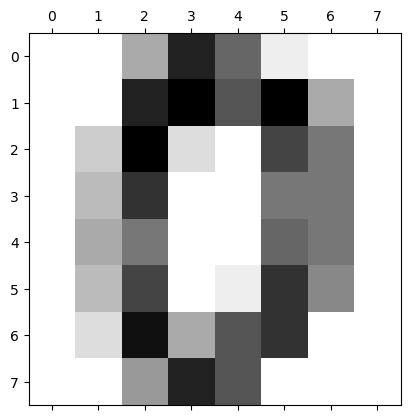

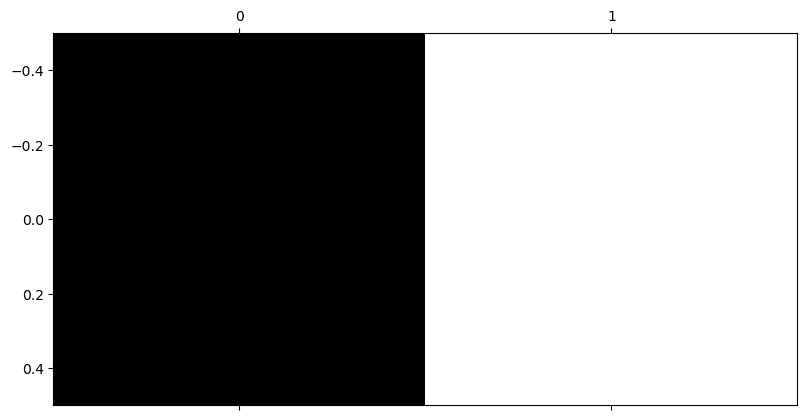

In [165]:
#tentativo di plottare l'embedding, non è che ci abbia capito troppo
plt.matshow(digits.data[0].reshape((8,8)), cmap = 'binary')
plt.matshow(digits_transformed[0].reshape((1,2)), cmap='binary')
plt.show()

In [166]:
#suddivisione del database in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits_transformed, digits.target[:500], test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


In [167]:
#applicazione della logistic regression. Max_iter aumentato per avere convergenza
clf = LogisticRegression(solver ='sag', max_iter = 5000).fit(X_train, y_train)

Correct answer:  1
Predicted answer:  1


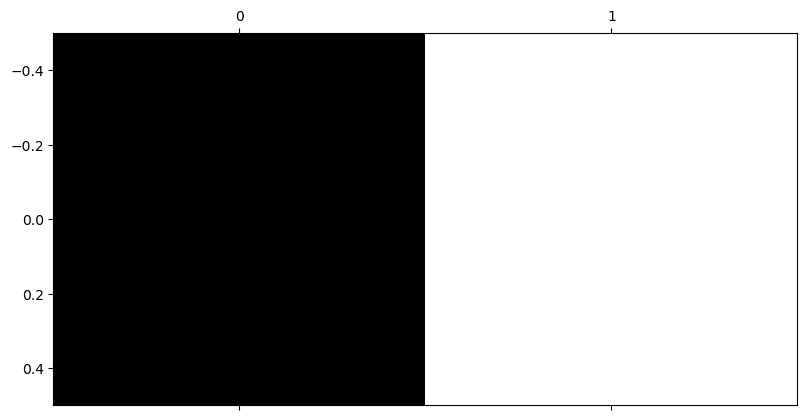

In [197]:
#visione di una predizione
chosen_index = 93
plt.matshow(X_test[chosen_index].reshape((1,2)), cmap = 'binary')
print('Correct answer: ', str(y_test[chosen_index]))
print('Predicted answer: ', str(clf.predict(X_test)[chosen_index]))

In [198]:
#accuracy scores calcolati in modo diversi
accuracy_1 = clf.score(X_test, y_test)
accuracy_2 = accuracy_score(y_test, clf.predict(X_test))
print(accuracy_1, accuracy_2)

0.7 0.7


In [199]:
#confusion matrix
print(confusion_matrix(y_test, clf.predict(X_test)))

[[ 3  0  0  0  0  0  3  0  0  0]
 [ 0  6  0  0  6  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  6  0  2  0  0]
 [ 0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  2  0  7  0  0  0  0]
 [ 0  0  1  0  0  0  7  0  0  0]
 [ 2  0  0  0  0  0  0 10  0  0]
 [ 0  0  2  0  0  0  0  0  4  0]
 [ 2  0  0  0  0  1  0  0  3  5]]


accuracy of 70% with two pixels?